In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


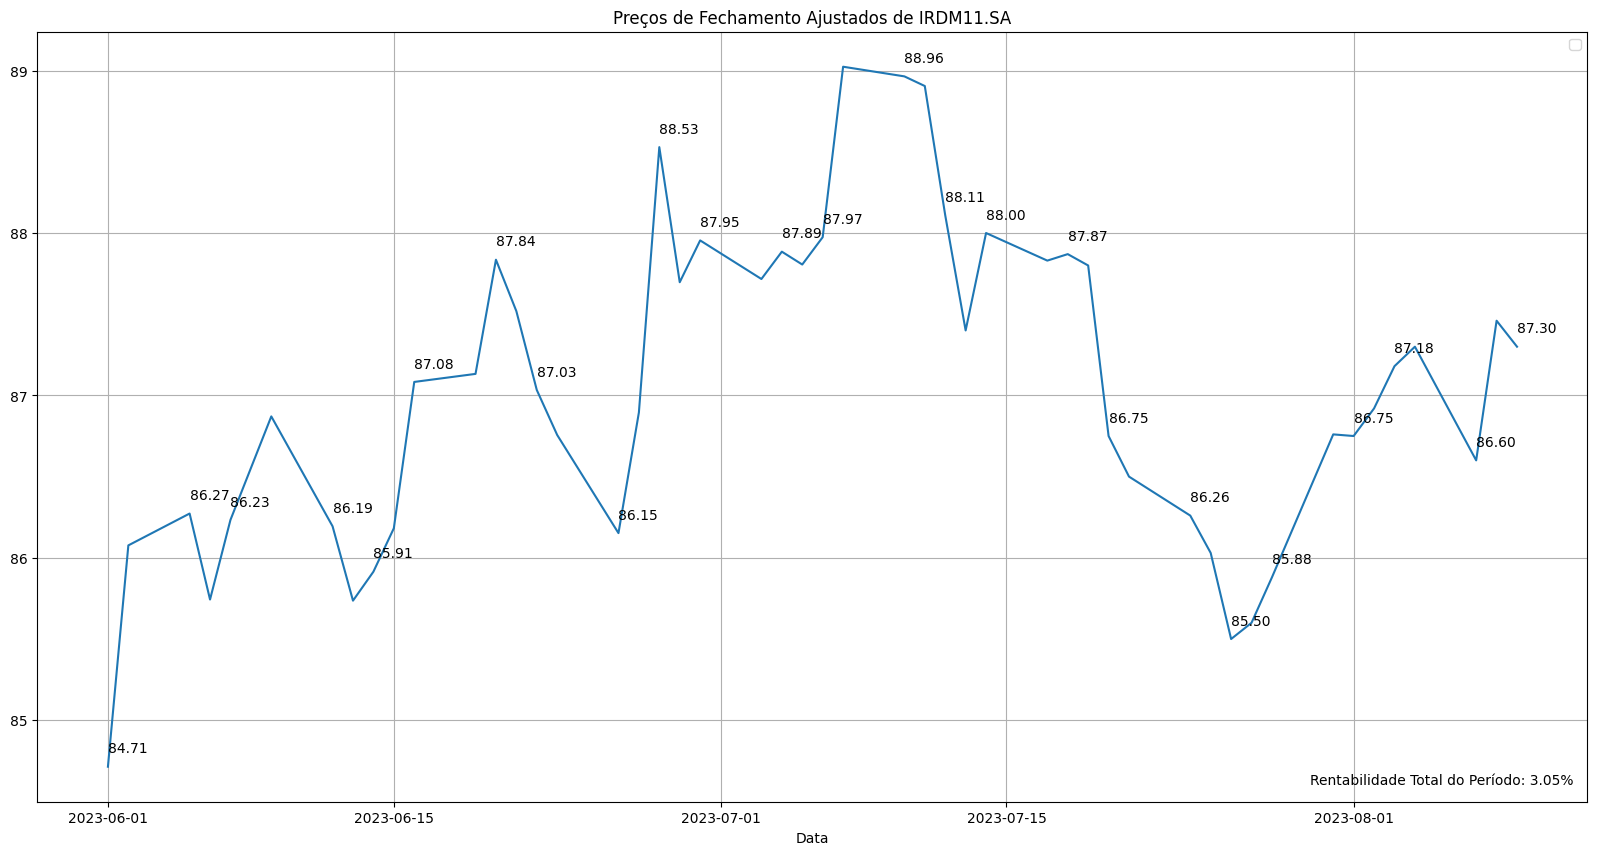

In [54]:
# Define o ticker da ação desejada
ticker = "IRDM11.SA"

# Define o intervalo de datas desejado para os dados históricos
start_date = "2023-06-01"
end_date = "2023-08-10"

# Obtém os dados históricos da ação usando a biblioteca yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Calcula a rentabilidade diária com base nos preços de fechamento ajustados
data['Daily_Return'] = data['Adj Close'].pct_change()

# Calcula a rentabilidade total do período
total_return = (data['Adj Close'][-1] / data['Adj Close'][0]) - 1

# Plota o gráfico de preços de fechamento ajustados diários
plt.figure(figsize=(20, 10))
plt.plot(data['Adj Close'])
plt.title(f"Preços de Fechamento Ajustados de {ticker}")
plt.xlabel("Data")
plt.grid(True)

# Define o espaçamento entre os valores a serem exibidos
spacing = 2

# Adiciona os valores de preço nas linhas do gráfico com o espaçamento
for index, value in enumerate(data['Adj Close']):
    if index % spacing == 0:  # Exibe somente a cada 'spacing' pontos
        plt.annotate(f'{value:.2f}', (data.index[index], value), textcoords="offset points", xytext=(0,10), ha='left')

plt.legend()

# Exibe a rentabilidade total do período fora do gráfico
plt.annotate(f'Rentabilidade Total do Período: {total_return:.2%}',
             xy=(1, 0), xycoords='axes fraction',
             xytext=(-10, 10), textcoords='offset points',
             ha='right', va='bottom')

plt.show()
